In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
from sklearn.metrics import confusion_matrix
import re
import scipy.sparse

import sys 
import os
sys.path.append(os.path.abspath("C:\\Users\\bence\\Projects\\BIO446\\McKinnon-Rosati-Laboratory\\Project 2\\jl_modules"))
import sc_module as sm

c:\Users\bence\Projects\BIO446\McKinnon-Rosati-Laboratory\env\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
c:\Users\bence\Projects\BIO446\McKinnon-Rosati-Laboratory\env\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
c:\Users\bence\Projects\BIO446\McKinnon-Rosati-Laboratory\env\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
c:\Users\bence\Projects\BIO446\McKinnon-Rosati-Laboratory\env\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
c:\Users\bence\Projects\BIO446\McKinnon-Ro

In [2]:
test_features = np.load('../../Arrays/test_features_zebrafish.npy')
test_labels = np.load('../../Arrays/test_labels_zebrafish.npy')
indices = np.load('../../Arrays/indices_zebrafish.npy', allow_pickle=True)

In [3]:
model = keras.models.load_model("../../Models/zebrafish_tf_nn_v1.h5") 

In [4]:
data = "../../Data/adata_zebrafish.h5ad"
adata = sc.read_h5ad(data)

In [5]:
adata

AnnData object with n_obs × n_vars = 43223 × 36250
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'nCount_MS', 'nFeature_MS', 'MS_class_SNR', 'MS_class_Seurat', 'method', 'sample', 'hpf', 'hpf.nice', 'stage.group', 'subset.full', 'subset', 'cluster', 'tissue', 'identity.super', 'identity.sub', 'identity.super.short', 'identity.sub.short', 'zfin', 'identity.super_numeric'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'identity.super.short_colors', 'identity.super_colors', 'tissue_colors'
    obsm: 'X_umap'

In [ ]:
prediction = model.predict(test_features)

In [ ]:
max_indices = np.argmax(prediction, axis=1)

In [ ]:
max_values = np.max(prediction, axis=1)

In [ ]:
adata.obs.loc[indices, 'predicted_celltype'] = max_indices

In [ ]:
adata.obs.loc[indices, 'accuracy'] = max_values

In [ ]:
mask = ~adata.obs['accuracy'].isna()
adata = adata[mask].copy()

In [ ]:
adata.obs['predicted_celltype']

In [ ]:
adata.obs['accuracy']

In [ ]:
print(adata.obsm["X_umap"])
print(adata.obsm["X_umap"].shape)
print(type(adata.obsm["X_umap"]))
print(adata.obsm["X_umap"].dtype)

In [21]:
replacement_dict = {
    'pharyngeal arch': 0,
    'oligodendrocytes': 1,
    'progenitors': 2,
    'intestine': 3,
    'telencephalon': 4,
    'hindbrain': 5,
    'sensory neurons': 6,
    'erythroblasts (primitive)': 7,
    'periderm': 8,
    'iridoblasts': 9,
    'lateral line primordium': 10,
    'cardiac mesenchyme': 11,
    'neurons': 12,
    'midbrain-hindbrain boundary': 13,
    'spinal cord': 14,
    'sclerotome': 15,
    'vasculature': 16,
    'xanthoblasts': 17,
    'diencephalon': 18,
    'heart': 19,
    'retinal progenitors': 20,
    'slow muscle': 21,
    'midbrain': 22,
    'somite': 23,
    'epidermis/placodal ectoderm': 24,
    'Kolmer-Agduhr / CSF-contacting neurons': 25,
    'otic': 26,
    'epidermis': 27,
    'ionocytes': 28,
    'sclerotome/satellite cells': 29,
    'somitic mesoderm': 30,
    'ventral forebrain': 31,
    'motor neurons': 32,
    'floor plate': 33,
    'presomitic/somitic mesoderm': 34,
    'liver': 35,
    'optic primordia': 36,
    'xanthophores': 37,
    'proximal convoluted tubule': 38,
    'fin epidermis': 39,
    'optic cup': 40,
    'placodal ectoderm': 41,
    'neural crest': 42,
    'satellite cells': 43,
    'meninges': 44,
    'erythrocytes (primitive)': 45,
    'melanoblasts': 46,
    'notochord': 47,
    'lens': 48,
    'migratory muscle precursors': 49,
    'hemangioblasts': 50,
    'cartilage/tendon': 51,
    'hematopoietic stem cell': 52,
    'periocular mesenchyme': 53,
    'olfactory epithelium': 54,
    'pharyngeal pouch': 55,
    'optic tectum': 56,
    'olfactory sensory receptor neurons': 57,
    'mucous secreting': 58,
    'Purkinje neurons': 59,
    'epiphysis photoreceptor cells': 60,
    'neural plate': 61,
    'granulocytes': 62,
    'distal late tubule': 63,
    'hatching gland': 64,
    'photoreceptors': 65,
    'endocrine pancreas': 66,
    'fibroblasts': 67,
    'radial glia': 68,
    'ciliated cells': 69,
    'adenohypophysis': 70,
    'ionocytes/mucous': 71,
    'fast muscle cell': 72,
    'parachordal cartilage': 73,
    'retinal pigmented epithelium': 74,
    'mesenchyme': 75,
    'melanocytes': 76,
    'macrophages': 77,
    'adaxial cells': 78,
    'endocardium': 79,
    'head mesenchyme': 80,
    'hemogenic endothelium': 81,
    'cephalic muscles': 82,
    'retinal ganglion cells': 83,
    'taste epithelium': 84,
    'cardiac muscle': 85,
    'fin epidermis + mesenchyme': 86,
    'pectoral fin bud': 87,
    'tail': 88,
    'retinal interneurons': 89,
    'preoptic area': 90,
    'medial fin mesenchyme': 91,
    'retinal bipolar cells': 92,
    'mural cell': 93,
    'cerebellum': 94
}

In [ ]:
test_features = np.load('../../Arrays/test_features_scgnn.npy')
test_labels = np.load('../../Arrays/test_labels_scgnn.npy')
indices = np.load('../../Arrays/indices_scgnn.npy', allow_pickle=True)

In [ ]:
model = keras.models.load_model("../../Models/granulomas_final_tf_nn_scgnn_v2.h5", custom_objects={'LeakyReLU': keras.layers.LeakyReLU}) #, custom_objects={'LeakyReLU': keras.layers.LeakyReLU}

In [ ]:
data = "../../Data/scGNN_matrix.h5ad"
adata = sc.read_h5ad(data)

In [ ]:
adata

In [ ]:
prediction = model.predict(test_features)
max_indices = np.argmax(prediction, axis=1)
max_values = np.max(prediction, axis=1)

In [ ]:
adata.obs.loc[indices, 'predicted_celltype'] = max_indices
adata.obs.loc[indices, 'accuracy'] = max_values
mask = ~adata.obs['accuracy'].isna()
adata = adata[mask].copy()

In [ ]:
adata.obs['predicted_celltype']

In [ ]:
adata.obs['accuracy']

In [ ]:
replacement_dict = {
    'AT2': 0,
    'B1': 1,
    'M-t1': 2,
    'DC': 3,
    'Th1': 4,
    'M-t2': 5,
    'Secretory': 6,
    'AM': 7,
    'N1': 8,
    'M-C1q': 9,
    'AT2-t2': 10,
    'AF': 11,
    'VEC': 12,
    'CAP1': 13,
    'N2': 14,
    'AT2-t1': 15,
    'Pericyte': 16,
    'pDC': 17,
    'Ciliated': 18,
    'NK': 19,
    'AT1': 20,
    'Tnaive': 21,
    'Treg': 22,
    'M-lc': 23,
    'Mesothelial': 24,
    'Tex': 25,
    'CAP2': 26,
    'LEC': 27,
    'iMon': 28,
    'B2': 29
}

In [ ]:
def abbreviate_name(name):
    # Remove any parenthetical content
    name_clean = re.sub(r'\(.*?\)', '', name)
    # Split on spaces, slashes, or hyphens
    words = re.split(r'[ /-]+', name_clean.strip())
    words = [w for w in words if w]
    
    if len(words) >= 3:
        # Take first letter of each of the first three words
        letters = [w[0].upper() for w in words[:3]]
    elif len(words) == 2:
        first, second = words
        # First letter of each, plus second letter of the first word if available
        letters = [
            first[0].upper(),
            second[0].upper(),
            first[1].upper() if len(first) > 1 else second[1].upper()
        ]
    else:
        first = words[0]
        # Take up to three letters from the single word, pad with 'X' if too short
        letters = [first[i].upper() if i < len(first) else 'X' for i in range(3)]
    
    return ''.join(letters)

In [ ]:
def plot_umap_with_abbreviations(adata, replacement_dict, 
                                 test_labels, max_indices, 
                                 confidence_col='accuracy', 
                                 umap_key='X_umap'):
    """
    Plot UMAP of predicted cell types with:
      - Abbreviated cell type labels
      - Large figure
      - Custom palette from `sm.wes`
    """

    #sc.pp.pca(adata, n_comps=50, svd_solver='arpack')
    #sc.pp.neighbors(adata, n_pcs=50)
    #sc.tl.umap(adata)

    # Invert the dictionary to map int -> cell type name
    inv_replacement = {v: k for k, v in replacement_dict.items()}
    
    # Convert predicted celltype indices to actual names
    adata.obs['predicted_celltype_name'] = (
        adata.obs['predicted_celltype'].astype(int).map(inv_replacement)
    )
    
    # Abbreviate names
    unique_types = sorted(adata.obs['predicted_celltype_name'].dropna().unique())
    abbrev_map = {ct: abbreviate_name(ct) for ct in unique_types} # commented for granuloma
    
    # Mean confidence per predicted cell type
    mean_confidence = adata.obs.groupby('predicted_celltype_name')[confidence_col].mean()
    confidence_dict = mean_confidence.to_dict()
    
    # External test accuracy from confusion matrix
    matrix = confusion_matrix(test_labels, max_indices)
    external_accuracy_values = matrix.diagonal() / matrix.sum(axis=1)
    external_accuracy_dict = {
        inv_replacement[i]: external_accuracy_values[i] 
        for i in range(len(external_accuracy_values))
    }
    
    # Pull UMAP coords from adata.obsm
    umap_coords = adata.obsm[umap_key]
    df_umap = pd.DataFrame(umap_coords, columns=['UMAP1','UMAP2'], index=adata.obs_names)
    df_umap['celltype'] = adata.obs['predicted_celltype_name']
    
    # Construct a color palette from sm.wes, cycling if needed
    # Make sure sm.wes has enough colors or we cycle them
    all_colors = list(sm.wes)  # or sm.some_other_palette
    # For 95 cell types, we might have to cycle
    from itertools import cycle
    color_cycle = cycle(all_colors)
    palette_dict = {}
    for ct in unique_types:
        palette_dict[ct] = next(color_cycle)
    
    ########################################
    # 3) Big figure + abbreviated text
    ########################################
    fig, ax = plt.subplots(figsize=(14, 14))  # Make the plot bigger # original: (24, 18)
    
    # Loop over each cell type group
    for cell_type, group in df_umap.groupby('celltype'):
        if pd.isna(cell_type):
            continue
        
        # Grab mean confidence and external test accuracy
        model_conf = confidence_dict.get(cell_type, np.nan)
        test_acc = external_accuracy_dict.get(cell_type, np.nan)
        
        # Abbreviated name
        short_name = abbrev_map[cell_type] # commented for granuloma
        
        # Build legend label with full name + model conf + test acc
        legend_label = f"{cell_type}: (conf: {model_conf:.2f}, acc: {test_acc:.2f})"
        
        # Scatter points
        ax.scatter(group['UMAP1'], group['UMAP2'],
                   s=2, alpha=0.6,
                   color=palette_dict[cell_type],
                   label=legend_label)
        
        # Place text with abbreviated name at center
        x_center = group['UMAP1'].mean()
        y_center = group['UMAP2'].mean()
        ax.text(x_center, y_center, short_name, # short_name instead of cell_type
                fontsize=5, fontweight='bold',
                horizontalalignment='center',
                verticalalignment='center',
                color='black',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))
    
    # Adjust legend
    ax.legend(bbox_to_anchor=(1.002, 1), loc='upper left',
              title='Cell Type (Conf, Acc)', fontsize=9)
    
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')
    ax.set_title('UMAP of Predicted Cell Types') # Zebrafish UMAP of Predicted Cell Types
    plt.tight_layout()
    plt.show()

In [ ]:
plot_umap_with_abbreviations(adata=adata,replacement_dict=replacement_dict,test_labels=test_labels,max_indices=max_indices,confidence_col='accuracy',umap_key='X_umap')

In [ ]:
'''# --- Step 2. Map predicted cell type indices to names ---
# Here we assume that the column 'predicted_celltype' (floats) holds the predicted class index.
# Alternatively, if you prefer to use 'cell_type_edit', just change the column name below.

# Invert the dictionary to map integer to cell type name.
inv_replacement = {v: k for k, v in replacement_dict.items()}

# Convert the predicted labels (as floats) to integers and map them to names.
adata.obs['predicted_celltype_name'] = adata.obs['predicted_celltype'].astype(int).map(inv_replacement)

# --- Step 3. Compute model confidence per cell type ---
# Here, the "accuracy" column is the maximum softmax probability for each cell.
# We group by the predicted cell type name and compute the mean confidence.
mean_confidence = adata.obs.groupby('predicted_celltype_name')['accuracy'].mean()
confidence_dict = mean_confidence.to_dict()  # maps cell type name -> mean confidence

# --- Step 4. Compute external test accuracy per cell type ---
# Using your provided confusion matrix code:
# (Make sure that test_labels and max_indices are defined in your workspace.)
matrix = confusion_matrix(test_labels, max_indices)
# For each class index, compute external accuracy: (true positives)/(total true counts)
external_accuracy_values = matrix.diagonal() / matrix.sum(axis=1)
# Map these values to cell type names using the inverted dictionary.
external_accuracy_dict = {inv_replacement[i]: external_accuracy_values[i] for i in range(len(external_accuracy_values))}

# --- Step 5. Prepare UMAP data for plotting ---
umap_coords = adata.obsm['X_umap']
df_umap = pd.DataFrame(umap_coords, columns=['UMAP1', 'UMAP2'], index=adata.obs_names)
df_umap['celltype'] = adata.obs['predicted_celltype_name']

# Create a color palette for the unique cell types.
unique_types = sorted(df_umap['celltype'].dropna().unique())
palette = dict(zip(unique_types, sns.color_palette("hls", len(unique_types))))

# --- Step 6. Plot the UMAP with both metrics in the legend ---
plt.figure(figsize=(15, 15))
ax = plt.gca()

# Loop over each cell type group
for cell_type, group in df_umap.groupby('celltype'):
    # Get model confidence and external test accuracy for the cell type
    model_conf = confidence_dict.get(cell_type, np.nan)
    test_acc = external_accuracy_dict.get(cell_type, np.nan)
    # Build the legend label with both numbers.
    legend_label = f"{cell_type} (model conf: {model_conf:.2f}, test acc: {test_acc:.2f})"
    
    # Scatter plot for the cells of this cell type.
    ax.scatter(group['UMAP1'], group['UMAP2'],
               s=10,         # adjust point size if needed
               alpha=0.7,
               color=palette[cell_type],
               label=legend_label)
    
    # Overlay the cell type name at the center of the group.
    x_center = group['UMAP1'].mean()
    y_center = group['UMAP2'].mean()
    ax.text(x_center, y_center, cell_type,
            fontsize=14, fontweight='bold',
            horizontalalignment='center',
            verticalalignment='center',
            color='black',
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=1))

# Place the legend outside the plot area.
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
          title='Cell Type (Model Confidence, Test Accuracy)')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_title('UMAP of Predicted Cell Types ')
plt.tight_layout()
plt.show()'''

In [6]:
killifish = "../../Data/controls_final_killifish.h5ad"
adata_killifish = sc.read_h5ad(killifish)

In [7]:
adata_killifish

AnnData object with n_obs × n_vars = 22513 × 21410
    obs: 'scDblFinder_score', 'scDblFinder_class', 'doublet', 'n_genes_by_counts', 'total_counts', 'leiden_0.4', 'leiden_1.0', 'leiden_1.4', 'type', 'sample', 'batch_type', 'batch', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'size_factors', 'leiden_0.2', 'leiden_0.3', 'leiden_0.6', 'leiden_0.8', 'leiden_1.7', 'leiden_2.0', 'leiden_2.5', 'leiden_3.0', 'leiden_3.5', 'kmeans', 'hclust', 'leiden_4.0', 'leiden_4.5', 'my_clust_1', 'immune', 'stromal', 'endothelial', 'epithelial', 'muscle', 'endoderm', 'intermediate mesoderm', 'Neurons', 'NPC', 'oligo', 'OPC', 'Radial Glia/NSCs', 'Microglia', 'Astrocyte', 'Schwann Cells', 'Skeletal Muscle', 'Smooth Muscle', 'Cardiomyocytes', 'Endocar

In [8]:
zebrafish_genes = adata.var_names
n_zebra_genes = len(zebrafish_genes)

In [9]:
killi_dict = {gene: i for i, gene in enumerate(adata_killifish.var_names)}

In [10]:
new_X = np.zeros((adata_killifish.n_obs, n_zebra_genes), dtype=np.float32)

In [11]:
for col_idx, gene in enumerate(zebrafish_genes):
    if gene in killi_dict:
        killi_col_idx = killi_dict[gene]
        new_X[:, col_idx] = adata_killifish.X[:, killi_col_idx]

In [12]:
prediction = model.predict(new_X)

704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step


In [13]:
max_indices = np.argmax(prediction, axis=1)
max_values = np.max(prediction, axis=1)

In [14]:
np.unique(max_indices, return_counts=True)

(array([ 2,  5, 12, 14, 45], dtype=int64),
 array([ 2543,  7422, 12539,     1,     8], dtype=int64))

In [15]:
adata_killifish.obs['predicted_celltype'] = max_indices
adata_killifish.obs['confidence'] = max_values

In [16]:
adata_killifish.obs['predicted_celltype'].value_counts()

predicted_celltype
12    12539
5      7422
2      2543
45        8
14        1
Name: count, dtype: int64

In [17]:
adata_killifish.obs['confidence'].mean()

0.66705894

In [37]:
def plot_killifish_predictions(adata_killifish, replacement_dict, umap_key='X_umap'):
    """
    Plots the killifish data with predicted cell type (from zebrafish model)
    and model confidence. Also includes the count of each cell type in the legend.
    
    Parameters
    ----------
    adata_killifish : AnnData
        AnnData containing:
          - obs['predicted_celltype'] : integer predictions (argmax)
          - obs['confidence']         : model confidence (max softmax prob)
          - obsm[umap_key]            : UMAP coordinates to plot
    replacement_dict : dict
        The dictionary mapping zebrafish cell-type string -> integer.
        We'll invert it to map int -> string.
    umap_key : str, optional
        The key in adata_killifish.obsm that holds UMAP coordinates, default 'X_umap'.
    palette_name : str, optional
        Name of a Seaborn palette (e.g., "tab10", "tab20", "hls", etc.).
    """
    
    # 1) Invert the dictionary: int -> cell type name
    inv_replacement = {v: k for k, v in replacement_dict.items()}
    
    # 2) Convert 'predicted_celltype' indices to names
    adata_killifish.obs['predicted_celltype_name'] = (
        adata_killifish.obs['predicted_celltype'].astype(int).map(inv_replacement)
    )
    
    # 3) Extract UMAP coords
    umap_coords = adata_killifish.obsm[umap_key]
    df = pd.DataFrame(
        umap_coords, 
        columns=['UMAP1', 'UMAP2'], 
        index=adata_killifish.obs_names
    )
    
    # 4) Add the predicted cell type name & confidence
    df['celltype']   = adata_killifish.obs['predicted_celltype_name']
    df['confidence'] = adata_killifish.obs['confidence']
    print(df['confidence'].mean())
    
    # 5) Compute counts per cell type
    counts_dict = df['celltype'].value_counts().to_dict()
    
    # 6) Create color palette using Seaborn
    unique_types = sorted(df['celltype'].dropna().unique())

    from itertools import cycle
    color_cycle = cycle(sm.wes)  # or any list of colors
    palette_dict = {}
    next(color_cycle)
    for ct in unique_types:
        next(color_cycle)
        next(color_cycle)
        #next(color_cycle)
        palette_dict[ct] = next(color_cycle)
    
    # 7) Plot
    fig, ax = plt.subplots(figsize=(12, 9))  # adjust size as needed
    
    for cell_type, group in df.groupby('celltype'):
        # Mean confidence for the legend
        mean_conf = group['confidence'].mean()
        # Count of cells
        ct_count = counts_dict.get(cell_type, 0)
        
        # Legend label: includes mean confidence and count
        legend_label = f"{cell_type} (conf={mean_conf:.2f}, n={ct_count})"
        
        ax.scatter(
            group['UMAP1'], group['UMAP2'],
            s=8, alpha=0.7,
            color=palette_dict[cell_type],
            label=legend_label
        )
        
        # Optionally place the cell type text at centroid
        x_center = group['UMAP1'].mean()
        y_center = group['UMAP2'].mean()
        ax.text(
            x_center, y_center, cell_type,
            fontsize=8, fontweight='bold',
            ha='center', va='center',
            color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1)
        )
    
    ax.legend(
        bbox_to_anchor=(1.04, 1),
        loc='upper left',
        fontsize=8,
        title='Cell Type (conf, count)'
    )
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')
    ax.set_title('UMAP of Predicted Cell Types')
    plt.tight_layout()
    plt.show()

# Usage Example:
# plot_killifish_predictions(
#     adata_killifish,
#     replacement_dict=zebrafish_replacement_dict,
#     umap_key='X_umap',
#     palette_name='tab10'
# )


0.66705894


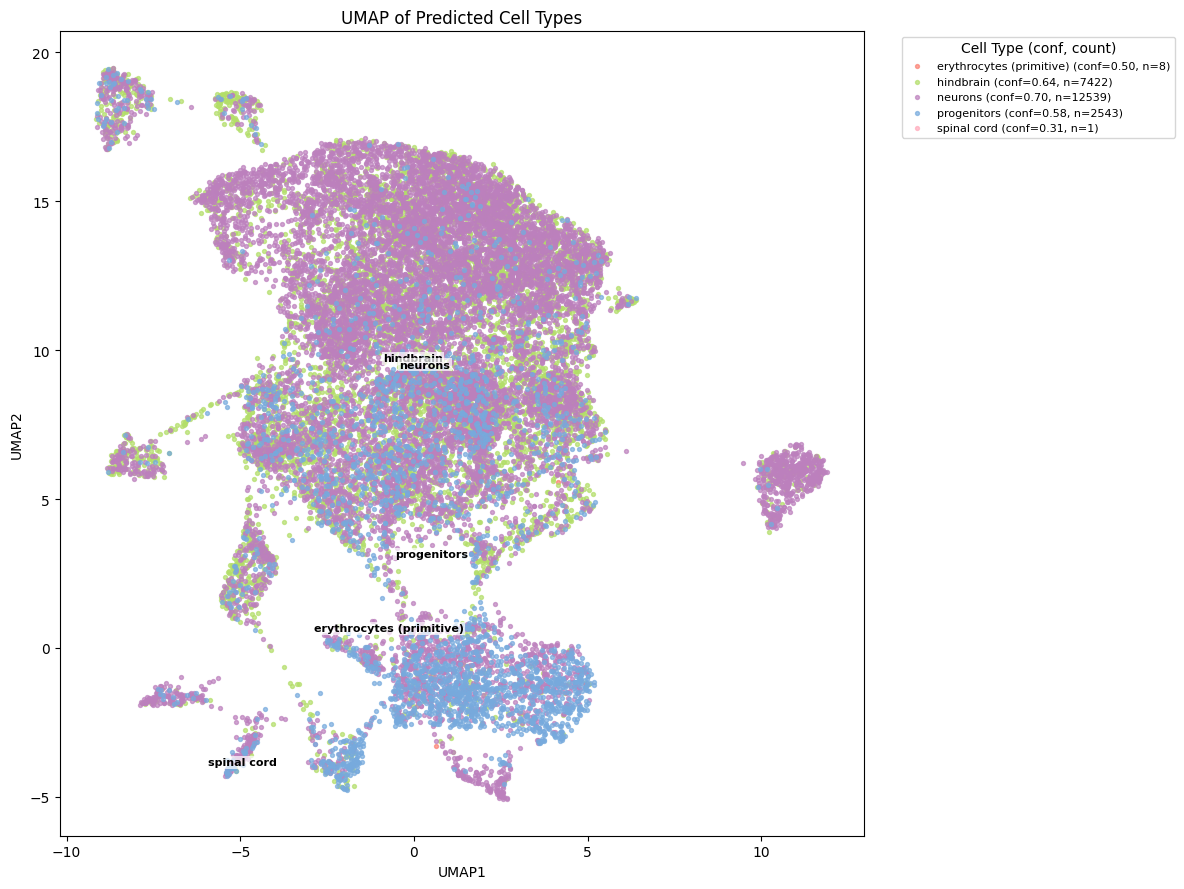

In [38]:
plot_killifish_predictions(adata_killifish, replacement_dict, umap_key='X_umap')

In [ ]:
# 1) Load your zebrafish and killifish data
#adata_zf = sc.read_h5ad("zebrafish_data.h5ad")      # shape ~ (N_cells, 36250 genes)
#adata_kf = sc.read_h5ad("killifish_data.h5ad")      # shape ~ (M_cells, 21410 genes)

# 2) Extract gene names (var_names) as Python sets
zebrafish_genes = set(adata.var_names)
killifish_genes = set(adata_killifish.var_names)

# 3) Find intersection
common_genes = zebrafish_genes.intersection(killifish_genes)
print(f"Number of overlapping genes: {len(common_genes)}")

# (Optional) Save to a text file:
with open("common_genes.txt", "w") as f:
    for g in sorted(common_genes):
        f.write(g + "\n")

In [ ]:
len(common_genes)

In [ ]:
(12040/36250)

In [ ]:
adata.var_names

In [ ]:
adata_killifish.var_names